### 隨機森林(Random forest)

隨機森林 = 進階版決策樹

由很多樹集合在一起，每一棵樹都是各自的決策樹

每一棵樹只能看見部分的特徵

集合每一棵樹的預測(使用多數決或平均)

是 Ensemble learning 中的 Bagging 的實例

### 隨機森林(分類器)的生成方法

1. 從訓練及中抽取 n' 筆資料出來
2. n' 筆資料隨機挑選k個特徵做樣本
3. 重複m次， 產生m棵決策樹
4. 多數投票機制進行預測

### 隨機森林的優點

1. 每棵樹會用到哪些訓練資料及特徵都是隨機決定
2. 採用多個決策樹的投票機制來改善決策樹
3. 與決策樹相比，不容易過度擬合
4. 隨機森林每一棵樹都是獨立的
5. 訓練或是預測的階段每一棵樹都能平行化的運行

In [1]:
import pandas as pd             #進行資料處理函式庫
import numpy as np              #高階大量的維度陣列與矩陣計算
import matplotlib.pyplot as plt #繪圖
import seaborn as sns           #繪圖
import io                       #負責處理資料 input/output
import requests                 #HTTP Request下載訓練資料用

### 一)載入資料集

In [2]:
url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
s = requests.get(url).content
df_train = pd.read_csv(io.StringIO(s.decode("utf-8")))
#df_train = df_train.drop(labels=["sepal.length"],axis=1)    #移除sepal.length  axis= 1為行 0為列
df_train

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


### 二)手動編碼

In [3]:
lable_map = {"Setosa":0,"Versicolor":1,"Virginica":2}
#將編碼後的lable map存至df_train["variety"]中。
df_train["Class"] = df_train["variety"].map(lable_map)

lable_map
df_train

,sepal.length,sepal.width,petal.length,petal.width,variety,Class
0,5.1,3.5,1.4,0.2,Setosa,0
1,4.9,3.0,1.4,0.2,Setosa,0
2,4.7,3.2,1.3,0.2,Setosa,0
3,4.6,3.1,1.5,0.2,Setosa,0
4,5.0,3.6,1.4,0.2,Setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica,2
146,6.3,2.5,5.0,1.9,Virginica,2
147,6.5,3.0,5.2,2.0,Virginica,2
148,6.2,3.4,5.4,2.3,Virginica,2


### 三)檢查缺失值

In [4]:
X = df_train.drop(labels=["variety","Class"],axis=1).values #移除 class,variety(因為字母不參與訓練)
#checked missing data
print("checked missing data(NAN mount):",len(np.where(np.isnan(X))[0]))

checked missing data(NAN mount): 0


### 四)切割訓練集與測試集

In [5]:
from sklearn.model_selection import train_test_split
X = df_train.drop(labels=["Class","variety"],axis=1)
y = df_train["Class"]
X_train , X_test ,y_train , y_test = train_test_split(X,y , test_size = .3 , random_state=42)

In [6]:
print("Training data shape : ",X_train.shape)
print("Testing data shape : ", X_test.shape)

Training data shape :  (105, 4)
Testing data shape :  (45, 4)


### 隨機森林(分類器)
隨機森林其實就是進階版的決策樹，隨機森林是使用Bagging + 隨機特徵的技術所產生出來的 Ensemble learning 演算法

Parameters:
1. n_estimators : 森林中樹木的數量 ， 預設=100。
2. max_features: 劃分時考慮的最大特徵數，預設為auto。
3. criterion : 亂度的評估標準，gini/entropy。預設為gini
4. max_depth : 樹的最大深度
5. splitter :  特徵劃分點選擇標準，best/random。預設為best
6. random_state : 亂數種子，確保每次訓練結果都一樣，splitter=random才有用
7. min_samples_split : 至少有多少資料才能再分
8. min_samples_leaf : 分完至少有多少資料才能分

Attributes:

feature_importances_ : 查詢模型特徵的重要程度

Methods:
1. fit : 放入X、y進行模型擬合
2. predict : 預測並回傳預測類別
3. score : 預測成功的比例
4. predict_proba : 預測每個類別的機率值
5. get_depth : 取得樹的深度

In [7]:
from sklearn.ensemble import RandomForestClassifier

#建立RandomForest模型
randomForestModel = RandomForestClassifier(n_estimators=100,criterion="gini")

#使用訓練資料訓練模型
randomForestModel.fit(X_train , y_train)

#使用訓練資料預測分類
predicted = randomForestModel.predict(X_train)

### 使用Score 評估模型

In [8]:
#預測成功的比例
print("訓練集: ", randomForestModel.score(X_train , y_train))
print("測試集: " , randomForestModel.score(X_test , y_test))

訓練集:  1.0
測試集:  1.0


### 特徵重要程度

In [9]:
print("特徵重要程度: ", randomForestModel.feature_importances_)

特徵重要程度:  [0.10073392 0.04072524 0.44391094 0.4146299 ]


### 真實分類

In [10]:
# 建立訓練集DataFrme
df_train = pd.DataFrame(X_train)
df_train["Class"] = y_train

#建立測試集的DataFrme
df_test = pd.DataFrame(X_test)
df_test["Class"] = y_test

d:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


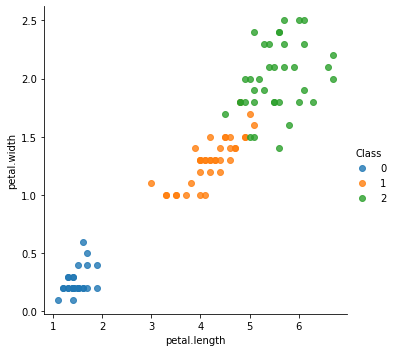

In [11]:
sns.lmplot("petal.length","petal.width",hue="Class",data=df_train,fit_reg=False)

### 隨機森林(訓練集)預測結果

d:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


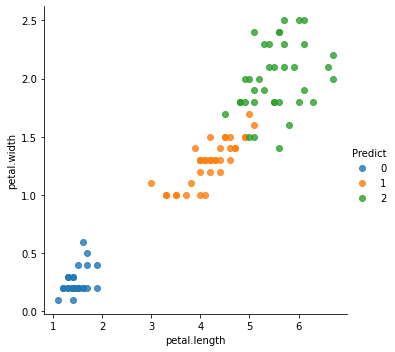

In [12]:
df_train["Predict"] = predicted
sns.lmplot("petal.length","petal.width",data = df_train,hue="Predict",fit_reg=False)

### 繪製森林中的每一棵樹

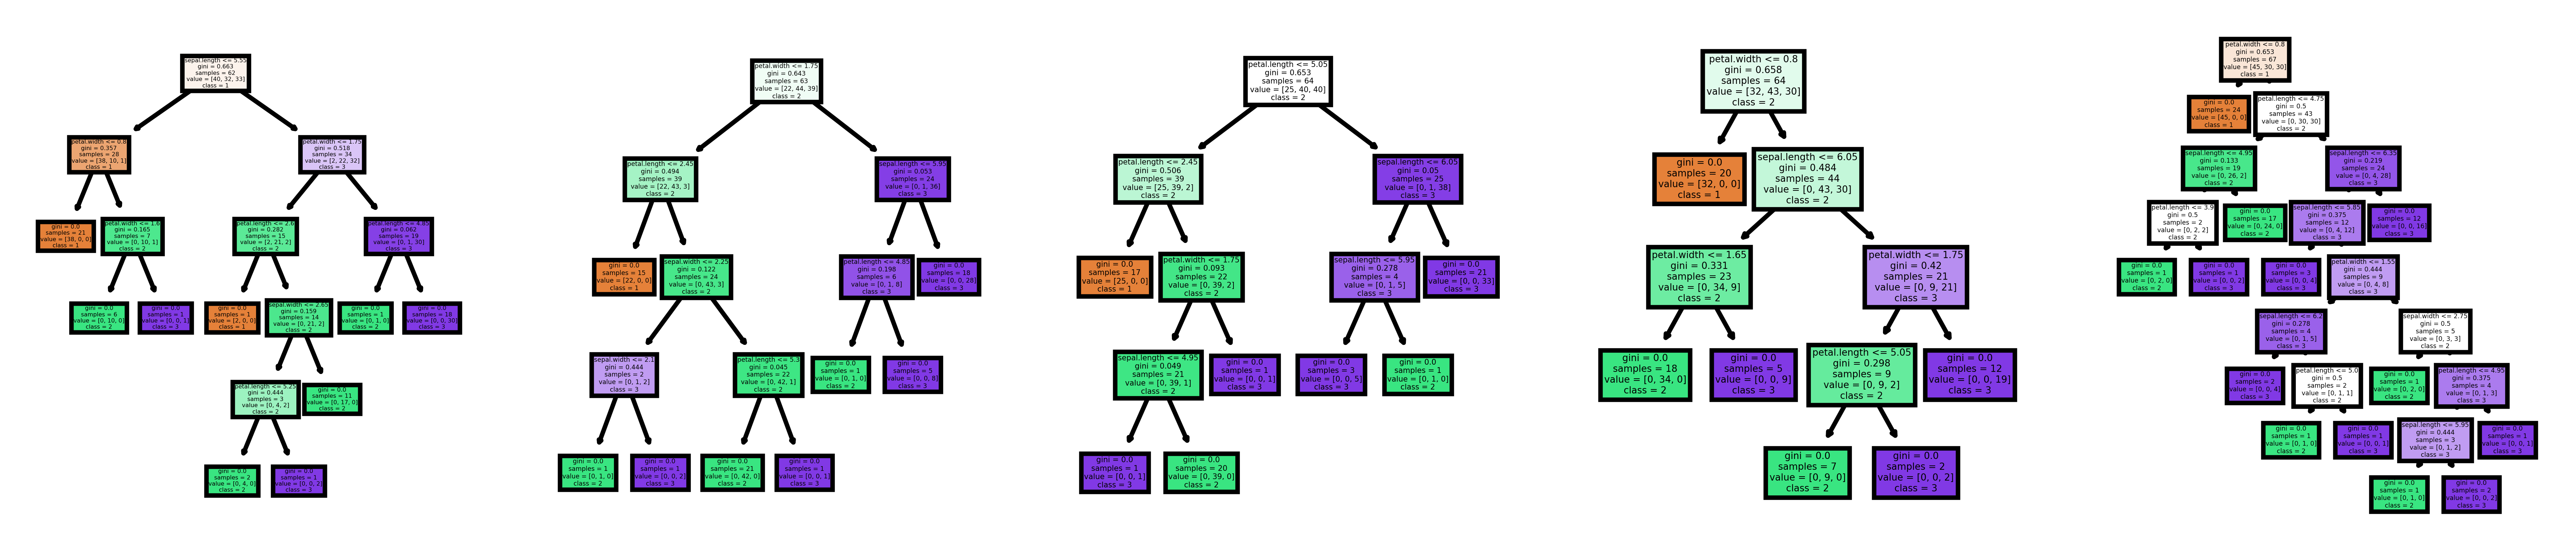

In [13]:
from sklearn import tree
featureName = ["sepal.length","sepal.width","petal.length","petal.width"]
className = ["1","2","3"]
fig , axes = plt.subplots(nrows =1 , ncols =5 , figsize=(10,2),dpi=900)

for index in range(0,5):
    tree.plot_tree(randomForestModel.estimators_[index],
    feature_names= featureName,class_names=className,
    filled= True,ax= axes[index])